In [1]:
from simforest import SimilarityTreeClassifier, SimilarityForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, load_iris, make_classification
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
X, y = make_blobs(n_samples=1000, centers=[(0, 0), (1, 1), (1.5, 1)], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

In [4]:
params = {
    'n_trees': [10, 20, 30, 40, 50, 60, 70, 80, 90]
}
sf = GridSearchCV(SimilarityForestClassifier(),
                  param_grid=params, cv=5)

sf.fit(X_train, y_train)
sf_pred = sf.predict(X_test)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
print(f'Similarity Forest accuracy score: {accuracy_score(y_test, sf_pred)}')

Similarity Forest accuracy score: 0.5366666666666666


In [6]:
sf.best_params_

{'n_trees': 80}

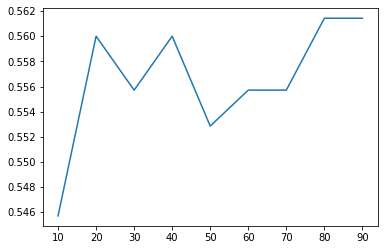

In [19]:
plt.plot(range(10,100,10), sf.cv_results_['mean_test_score'])

In [20]:
params = {
    'n_directions': [1, 2, 3, 4]
}
sf_dir = GridSearchCV(SimilarityForestClassifier(n_trees=20),
                  param_grid=params, cv=5)

sf_dir.fit(X_train, y_train)
sf_dir_pred = sf_dir.predict(X_test)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
print(f'Similarity Forest accuracy score: {accuracy_score(y_test, sf_dir_pred)}')

Similarity Forest accuracy score: 0.5433333333333333


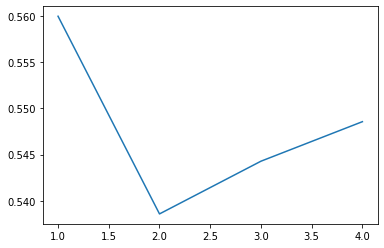

In [30]:
plt.plot(range(1,5,1), sf_dir.cv_results_['mean_test_score'])